In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# datetime for dt conversion
from datetime import datetime

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [158]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries_list.append(country)


# Print the city count to confirm sufficient count
len(cities)

641

In [159]:
cities

['hobart',
 'noumea',
 'nikolskoye',
 'busselton',
 'bredasdorp',
 'mongu',
 'hermanus',
 'arraial do cabo',
 'kavieng',
 'vardo',
 'hilo',
 'saint george',
 'mamaku',
 'warqla',
 'khonuu',
 'adrar',
 'butaritari',
 'ingleside',
 'qaanaaq',
 'saskylakh',
 'vaini',
 'mnogovershinnyy',
 'axioupoli',
 'cape town',
 'ushuaia',
 'barentsburg',
 'tuggurt',
 'cayenne',
 'cooma',
 'sauda',
 'upernavik',
 'brownsville',
 'bethel',
 'cidreira',
 'gold coast',
 'nurota',
 'taolanaro',
 'albany',
 'lompoc',
 'kyaikkami',
 'ponta do sol',
 'san cristobal',
 'grand centre',
 'vostok',
 'tuktoyaktuk',
 'ewa beach',
 'caravelas',
 'abu samrah',
 'armacao dos buzios',
 'burlington',
 'manbij',
 'baghdad',
 'mataura',
 'georgetown',
 'dikson',
 'geraldton',
 'sampit',
 'victoria',
 'puerto ayora',
 'atuona',
 'radhanpur',
 'tautira',
 'tamuin',
 'phrae',
 'leningradskiy',
 'punta arenas',
 'atar',
 'broken hill',
 'saint-philippe',
 'sitka',
 'honningsvag',
 'clyde river',
 'barrow',
 'portland',
 'samu

In [160]:
countries_list

['au',
 'nc',
 'ru',
 'au',
 'za',
 'zm',
 'za',
 'br',
 'pg',
 'no',
 'us',
 'bm',
 'nz',
 'dz',
 'ru',
 'dz',
 'ki',
 'us',
 'gl',
 'ru',
 'to',
 'ru',
 'gr',
 'za',
 'ar',
 'sj',
 'dz',
 'gf',
 'au',
 'no',
 'gl',
 'us',
 'us',
 'br',
 'au',
 'uz',
 'mg',
 'au',
 'us',
 'mm',
 'cv',
 'ec',
 'ca',
 'ru',
 'ca',
 'us',
 'br',
 'qa',
 'br',
 'us',
 'sy',
 'iq',
 'pf',
 'sh',
 'ru',
 'au',
 'id',
 'sc',
 'ec',
 'pf',
 'in',
 'pf',
 'mx',
 'th',
 'ru',
 'cl',
 'mr',
 'au',
 're',
 'us',
 'no',
 'ca',
 'us',
 'au',
 'ws',
 'pf',
 'ru',
 'jp',
 'ie',
 'an',
 'mx',
 'ca',
 'pf',
 'sa',
 'ar',
 'kz',
 'mg',
 'jp',
 'gl',
 'sa',
 'cl',
 'gl',
 'ru',
 'cn',
 'ro',
 'au',
 'pe',
 'ru',
 'us',
 'br',
 'us',
 'in',
 'cl',
 'gl',
 'jp',
 'cn',
 'ng',
 'mg',
 'ru',
 'mv',
 'sl',
 'lr',
 'ca',
 'ca',
 'ar',
 'au',
 'tz',
 'br',
 'au',
 'na',
 'cn',
 'br',
 'pa',
 'ru',
 'nz',
 'do',
 'gl',
 'ru',
 'ru',
 'cf',
 'by',
 'us',
 'ca',
 'au',
 'ae',
 'gy',
 'id',
 'sh',
 'ru',
 'tr',
 'us',
 'de',
 'jp',

In [161]:
# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries_list)        
        
list(city_country)

[('hobart', 'au'),
 ('noumea', 'nc'),
 ('nikolskoye', 'ru'),
 ('busselton', 'au'),
 ('bredasdorp', 'za'),
 ('mongu', 'zm'),
 ('hermanus', 'za'),
 ('arraial do cabo', 'br'),
 ('kavieng', 'pg'),
 ('vardo', 'no'),
 ('hilo', 'us'),
 ('saint george', 'bm'),
 ('mamaku', 'nz'),
 ('warqla', 'dz'),
 ('khonuu', 'ru'),
 ('adrar', 'dz'),
 ('butaritari', 'ki'),
 ('ingleside', 'us'),
 ('qaanaaq', 'gl'),
 ('saskylakh', 'ru'),
 ('vaini', 'to'),
 ('mnogovershinnyy', 'ru'),
 ('axioupoli', 'gr'),
 ('cape town', 'za'),
 ('ushuaia', 'ar'),
 ('barentsburg', 'sj'),
 ('tuggurt', 'dz'),
 ('cayenne', 'gf'),
 ('cooma', 'au'),
 ('sauda', 'no'),
 ('upernavik', 'gl'),
 ('brownsville', 'us'),
 ('bethel', 'us'),
 ('cidreira', 'br'),
 ('gold coast', 'au'),
 ('nurota', 'uz'),
 ('taolanaro', 'mg'),
 ('albany', 'au'),
 ('lompoc', 'us'),
 ('kyaikkami', 'mm'),
 ('ponta do sol', 'cv'),
 ('san cristobal', 'ec'),
 ('grand centre', 'ca'),
 ('vostok', 'ru'),
 ('tuktoyaktuk', 'ca'),
 ('ewa beach', 'us'),
 ('caravelas', 'br'),
 (

In [162]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# See what the links lay out looks like
city_url_test = f"{url}appid={weather_key}&units={units}&q=mataura"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=jamestown"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=tumbes,pe"

# print(city_country_url_test)



In [163]:
# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
success_city_list = open('weatherAPI_printlog.txt', 'w')
city_data_outcome = open('city_weather_outcome.txt', 'w')
api_data_outcome = open('weatherAPI_data.csv', 'w')
# Header's for csv files
api_data_outcome.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

94

In [164]:

# set up lists to hold reponse info
# in ['coord']
lon = []
lat = []
# in ['weather']
weather_id = []
main_weather = []
weather_description = []
weather_icon = []
# in ['base']
base_base = []
# in ['main]
main_temp = []
main_feels_like = []
main_temp_min = []
main_temp_max = []
main_pressure = []
main_humidity = []
# in ['visibility']
visibility_visibility = []
# in ['wind']
wind_speed = []
wind_deg = []
# in ['clouds']
clouds_all = []
# in ['dt']
dt_weather_data = []
# in ['sys']
sys_type = []
sys_id = []
sys_country = []
sys_sunrise = []
sys_sunset = []
# in ['timezone']
timezone_timezone = []
# in ['id']
city_id = []
# in ['name']
city_name = []
# in ['cod']
cod_cod = []

number = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    # to get the number of city in for loop
    number.append(city)
    number_of_city = len(number)
    try:
        # first dict
        lon.append(response['coord']['lon'])
        lon_only = response['coord']['lon']
        lat.append(response['coord']['lat'])
        lat_only = response['coord']['lat']


        # second dict
        # weather_id.append(response['weather'][0]['id'])
        # main_weather.append(response['weather'][0]['main'])
        # weather_description.append(response['weather'][0]['description'])
        # weather_icon.append(response['weather'][0]['icon'])

        # third dict
        # base_base.append(response['base'])

        # fourth dict
        main_temp.append(response['main']['temp'])
        main_temp_only = response['main']['temp']
        # main_feels_like.append(response['main']['feels_like'])
        main_temp_min.append(response['main']['temp_min'])
        main_temp_min_only = response['main']['temp_min']
        main_temp_max.append(response['main']['temp_max'])
        main_temp_max_only = response['main']['temp_max']
        # main_pressure.append(response['main']['pressure'])
        main_humidity.append(response['main']['humidity'])
        main_humidity_only = response['main']['humidity']

        # fifth dict
        # visibility_visibility.append(response['visibility'])

        # sixth dict
        wind_speed.append(response['wind']['speed'])
        wind_speed_only = response['wind']['speed']
        # wind_deg.append(response['wind']['deg'])

        # seventh dict
        clouds_all.append(response['clouds']['all'])
        clouds_all_only = response['clouds']['all']
        # eight dict
        dt_weather_date = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        dt_weather_data.append(dt_weather_date)

        # ninth dict
        # sys_type.append(response['sys']['type'])
        # sys_id.append(response['sys']['id'])
        sys_country.append(response['sys']['country'])
        sys_country_only = response['sys']['country']
        # sys_sunrise.append(response['sys']['sunrise'])
        # sys_sunset.append(response['sys']['sunset'])

        # tenth dict
        # timezone_timezone.append(response['timezone'])

        # eleventh dict
        city_id.append(response['id'])
        city_id_only = int(response['id'])

        # twelveth dict
        city_name.append(response['name'])
        city_name_only = response['name']

        # thirteen dict
        # cod_cod.append(response['cod'])
        
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{number_of_city}. {city_name_only} with city ID:{city_id_only} was found in the Weathermap API\n")
        success_city_list.write(f"Success found: {city_name_only}  City ID:{city_id_only} \n")
        
        # Output all retreived values to a csv file

        city_data_outcome.write(f"The outcome data of {city_name_only}, {sys_country_only}: Lat & Lon --> {lat_only},{lon_only} Weather Date --> {dt_weather_date} Weather --> Temperature, Max Temp and Min Temp: {main_temp_only} & {main_temp_max_only} & {main_temp_min_only} Humidity: {main_humidity_only} Clouds: {clouds_all_only} Wind Speed: {wind_speed_only}\n")

        api_data_outcome.write(f"{city_id_only},{city_name_only},{sys_country_only},{lat_only},{lon_only},{dt_weather_date},\
            {main_temp_max_only},{main_humidity_only},{clouds_all_only},{wind_speed_only}\n")

    # Handle exceptions for a character that is not available 
    except:
        success_city_list.write(f"{number_of_city}. {city} was not found. \n")
        print(" - " * 10)
        print(f"{number_of_city}. {city} was not found" )
        print(" - " * 10)

        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        sys_country.append(None)
        lat.append(None)
        lon.append(None)
        dt_weather_data.append(None)
        main_temp.append(None)
        main_temp_max.append(None)
        main_temp_min.append(None)
        main_humidity.append(None)
        clouds_all.append(None)
        wind_speed.append(None)
        #keep code going
        pass


# After getting data in a for loop... we want to make sure our text file's do not change... basically convert our text files to raw data
success_city_list.close()
city_data_outcome.close()
api_data_outcome.close()

1. Hobart with city ID:2163355 was found in the Weathermap API

2. Noumea with city ID:2139521 was found in the Weathermap API

3. Nikolskoye with city ID:546105 was found in the Weathermap API

4. Busselton with city ID:2075265 was found in the Weathermap API

5. Bredasdorp with city ID:1015776 was found in the Weathermap API

6. Mongu with city ID:906054 was found in the Weathermap API

7. Hermanus with city ID:3366880 was found in the Weathermap API

8. Arraial do Cabo with city ID:3471451 was found in the Weathermap API

9. Kavieng with city ID:2094342 was found in the Weathermap API

10. Vardø with city ID:777019 was found in the Weathermap API

11. Hilo with city ID:5855927 was found in the Weathermap API

12. Saint George with city ID:5546220 was found in the Weathermap API

13. Mamaku with city ID:2187834 was found in the Weathermap API

 -  -  -  -  -  -  -  -  -  - 
14. warqla was not found
 -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  - 
15. khonuu was not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [165]:
# create a dictionary from the lists that we created above
weather_table_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": sys_country,
    "latitude": lat,
    "longitude": lon,
    "weather_date": dt_weather_date,
    "temp": main_temp,
    "temp max": main_temp_max,
    "temp min": main_temp_min, 
    "humidity": main_humidity,
    "cloudiness": clouds_all,
    "wind_speed": wind_speed
}

weather_data = pd.DataFrame(weather_table_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355.0,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521.0,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105.0,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265.0,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09


In [166]:
weather_data.count()

city_id         585
city_name       585
country         585
latitude        585
longitude       585
weather_date    656
temp            585
temp max        585
temp min        585
humidity        585
cloudiness      585
wind_speed      585
dtype: int64

In [167]:
# From the table, we have some values that are not wanted... since we did ----.append(None) to create fake values if it had a missing column
weather_data_clean = weather_data.dropna()
weather_data_clean.count()


city_id         585
city_name       585
country         585
latitude        585
longitude       585
weather_date    585
temp            585
temp max        585
temp min        585
humidity        585
cloudiness      585
wind_speed      585
dtype: int64

In [168]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355.0,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521.0,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105.0,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265.0,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
651,5445820.0,Liberal,US,37.0431,-100.9210,11/13/21,8.26,10.57,8.08,49.0,1.0,3.09
652,2062276.0,Roebourne,AU,-20.7833,117.1333,11/13/21,31.46,31.46,31.46,20.0,26.0,6.12
653,780687.0,Berlevåg,NO,70.8578,29.0864,11/13/21,-1.00,-1.00,-1.00,90.0,100.0,7.92
654,489910.0,Sozimskiy,RU,59.7418,52.2482,11/13/21,-9.84,-9.84,-9.84,87.0,46.0,3.32


In [169]:
# reset index since we took out some unwanted data... make sure we reset index and drop those are not needed
weather_data_clean = weather_data_clean.reset_index(drop=True)
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355.0,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521.0,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105.0,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265.0,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
580,5445820.0,Liberal,US,37.0431,-100.9210,11/13/21,8.26,10.57,8.08,49.0,1.0,3.09
581,2062276.0,Roebourne,AU,-20.7833,117.1333,11/13/21,31.46,31.46,31.46,20.0,26.0,6.12
582,780687.0,Berlevåg,NO,70.8578,29.0864,11/13/21,-1.00,-1.00,-1.00,90.0,100.0,7.92
583,489910.0,Sozimskiy,RU,59.7418,52.2482,11/13/21,-9.84,-9.84,-9.84,87.0,46.0,3.32


In [170]:
# Make sure all columns are integers or floats that hold numbers
print(weather_data_clean['city_id'])
print("")
print(weather_data_clean['latitude'])
print("")
print(weather_data_clean['longitude'])
print("")
print(weather_data_clean['temp'])
print("")
print(weather_data_clean['humidity'])
print("")
print(weather_data_clean['temp min'])
print("")
print(weather_data_clean['cloudiness'])
print("")
print(weather_data_clean['wind_speed'])
print("")

# all of the values are floats... in an article, integers are better to work with for plotting... 
# https://www.dummies.com/programming/c/the-real-difference-between-integers-and-floating-point-values/#:~:text=The%20bottom%20line%20is%20that%20it%20takes%20more,values%3B%20use%20the%20floating-point%20numbers%20only%20when%20necessary.


0      2163355.0
1      2139521.0
2       546105.0
3      2075265.0
4      1015776.0
         ...    
580    5445820.0
581    2062276.0
582     780687.0
583     489910.0
584    1563281.0
Name: city_id, Length: 585, dtype: float64

0     -42.8794
1     -22.2763
2      59.7035
3     -33.6500
4     -34.5322
        ...   
580    37.0431
581   -20.7833
582    70.8578
583    59.7418
584    13.0833
Name: latitude, Length: 585, dtype: float64

0      147.3294
1      166.4572
2       30.7861
3      115.3333
4       20.0403
         ...   
580   -100.9210
581    117.1333
582     29.0864
583     52.2482
584    109.3000
Name: longitude, Length: 585, dtype: float64

0      12.11
1      33.99
2       2.68
3      20.58
4      11.82
       ...  
580     8.26
581    31.46
582    -1.00
583    -9.84
584    23.87
Name: temp, Length: 585, dtype: float64

0      57.0
1      74.0
2      92.0
3      40.0
4      90.0
       ... 
580    49.0
581    20.0
582    90.0
583    87.0
584    97.0
Name: humidity, Lengt

In [171]:
# convert columns into integers that do not need decimals such as city_id
weather_data_clean['city_id'] = weather_data_clean['city_id'].astype(int)
print(weather_data_clean['city_id'])

0      2163355
1      2139521
2       546105
3      2075265
4      1015776
        ...   
580    5445820
581    2062276
582     780687
583     489910
584    1563281
Name: city_id, Length: 585, dtype: int32


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Blank vs Blank Plots

### City Latitude vs Temperature

In [172]:
weather_Date_col = weather_data_clean['weather_date'][0]
weather_Date_col

'11/13/21'

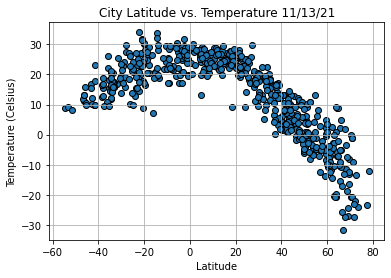

In [173]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]
plt.scatter(weather_data_clean["latitude"], weather_data_clean["temp"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Temperature {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Temperature (Celsius)")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Temperature.png")

# Show plot
plt.show()

### City Latitude vs Humidity

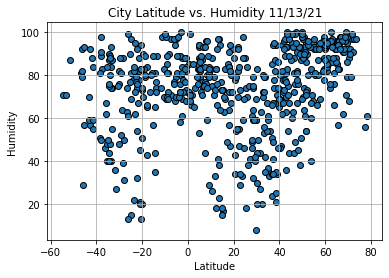

In [174]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'humidity' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["humidity"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Humidity {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Humidity")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

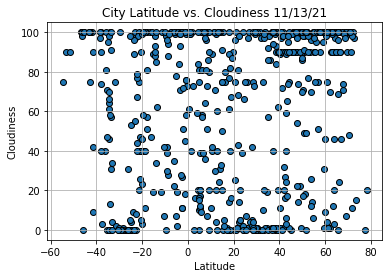

In [175]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'cloudiness' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["cloudiness"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Cloudiness {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Cloudiness")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

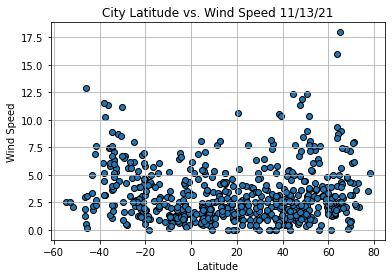

In [176]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'wind_speed' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["wind_speed"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Wind Speed {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Wind Speed")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

### Northern and Southern DataFrames

#### Northern Data Frame

In [177]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
580,5445820,Liberal,US,37.0431,-100.9210,11/13/21,8.26,10.57,8.08,49.0,1.0,3.09
581,2062276,Roebourne,AU,-20.7833,117.1333,11/13/21,31.46,31.46,31.46,20.0,26.0,6.12
582,780687,Berlevåg,NO,70.8578,29.0864,11/13/21,-1.00,-1.00,-1.00,90.0,100.0,7.92
583,489910,Sozimskiy,RU,59.7418,52.2482,11/13/21,-9.84,-9.84,-9.84,87.0,46.0,3.32


In [178]:
# By this code... it will only take the column of 'wind_speed' and tell us what values equals or over 1. 
# false = less than one 
# true = more than one or equals
wind_speed_over_1 = weather_data_clean.wind_speed >= 1
print(wind_speed_over_1)

0      True
1      True
2      True
3      True
4      True
       ... 
580    True
581    True
582    True
583    True
584    True
Name: wind_speed, Length: 585, dtype: bool


In [179]:
# Apply the code from above for the northern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
northern_hemisphere = weather_data_clean.longitude >= 0
print(f"{northern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
northern_data = weather_data_clean[northern_hemisphere]
print(f"{northern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
northern_data = northern_data.reset_index(drop=True)

0       True
1       True
2       True
3       True
4       True
       ...  
580    False
581     True
582     True
583     True
584     True
Name: longitude, Length: 585, dtype: bool

--------------------
     city_id   city_name country  latitude  longitude weather_date   temp  \
0    2163355      Hobart      AU  -42.8794   147.3294     11/13/21  12.11   
1    2139521      Noumea      NC  -22.2763   166.4572     11/13/21  33.99   
2     546105  Nikolskoye      RU   59.7035    30.7861     11/13/21   2.68   
3    2075265   Busselton      AU  -33.6500   115.3333     11/13/21  20.58   
4    1015776  Bredasdorp      ZA  -34.5322    20.0403     11/13/21  11.82   
..       ...         ...     ...       ...        ...          ...    ...   
579   477940  Ust-Tsilma      RU   65.4410    52.1498     11/13/21  -5.13   
581  2062276   Roebourne      AU  -20.7833   117.1333     11/13/21  31.46   
582   780687    Berlevåg      NO   70.8578    29.0864     11/13/21  -1.00   
583   489910   Sozimski

In [180]:
# Main clean northern data
northern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
333,477940,Ust-Tsilma,RU,65.4410,52.1498,11/13/21,-5.13,-5.13,-5.13,83.0,100.0,3.86
334,2062276,Roebourne,AU,-20.7833,117.1333,11/13/21,31.46,31.46,31.46,20.0,26.0,6.12
335,780687,Berlevåg,NO,70.8578,29.0864,11/13/21,-1.00,-1.00,-1.00,90.0,100.0,7.92
336,489910,Sozimskiy,RU,59.7418,52.2482,11/13/21,-9.84,-9.84,-9.84,87.0,46.0,3.32


#### Southern Data Frame

In [181]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,2163355,Hobart,AU,-42.8794,147.3294,11/13/21,12.11,12.92,8.95,57.0,75.0,1.79
1,2139521,Noumea,NC,-22.2763,166.4572,11/13/21,33.99,33.99,33.99,74.0,44.0,2.88
2,546105,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.68,3.82,0.99,92.0,100.0,2.18
3,2075265,Busselton,AU,-33.6500,115.3333,11/13/21,20.58,20.58,20.58,40.0,91.0,6.33
4,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,11.82,11.82,11.82,90.0,46.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
580,5445820,Liberal,US,37.0431,-100.9210,11/13/21,8.26,10.57,8.08,49.0,1.0,3.09
581,2062276,Roebourne,AU,-20.7833,117.1333,11/13/21,31.46,31.46,31.46,20.0,26.0,6.12
582,780687,Berlevåg,NO,70.8578,29.0864,11/13/21,-1.00,-1.00,-1.00,90.0,100.0,7.92
583,489910,Sozimskiy,RU,59.7418,52.2482,11/13/21,-9.84,-9.84,-9.84,87.0,46.0,3.32


In [182]:
# Apply the code from above for the southern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
southern_hemisphere = weather_data_clean.longitude < 0
print(f"{southern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
southern_data = weather_data_clean[southern_hemisphere]
print(f"{southern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
southern_data = southern_data.reset_index(drop=True)

0      False
1      False
2      False
3      False
4      False
       ...  
580     True
581    False
582    False
583    False
584    False
Name: longitude, Length: 585, dtype: bool

--------------------
     city_id        city_name country  latitude  longitude weather_date  \
7    3471451  Arraial do Cabo      BR  -22.9661   -42.0278     11/13/21   
10   5855927             Hilo      US   19.7297  -155.0900     11/13/21   
11   5546220     Saint George      US   37.1041  -113.5841     11/13/21   
13   2381972            Adrar      MR   20.5022   -10.0711     11/13/21   
15   4700033        Ingleside      US   27.8778   -97.2117     11/13/21   
..       ...              ...     ...       ...        ...          ...   
568  2270258           Caniço      PT   32.6333   -16.8500     11/13/21   
572  3827693      La Macarena      CO    2.1837   -73.7849     11/13/21   
573  3395458         Maragogi      BR   -9.0122   -35.2225     11/13/21   
575  5226534        Brookings      US   44.

In [183]:
# Main clean northern data
southern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.25,20.25,20.25,62.0,100.0,3.88
1,5855927,Hilo,US,19.7297,-155.0900,11/13/21,24.36,25.44,23.95,92.0,90.0,0.00
2,5546220,Saint George,US,37.1041,-113.5841,11/13/21,15.84,17.66,14.26,41.0,1.0,0.89
3,2381972,Adrar,MR,20.5022,-10.0711,11/13/21,22.34,22.34,22.34,43.0,25.0,3.58
4,4700033,Ingleside,US,27.8778,-97.2117,11/13/21,16.66,19.42,13.05,61.0,1.0,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...
242,2270258,Caniço,PT,32.6333,-16.8500,11/13/21,19.51,20.35,17.85,80.0,75.0,4.12
243,3827693,La Macarena,CO,2.1837,-73.7849,11/13/21,23.16,23.16,23.16,85.0,73.0,1.49
244,3395458,Maragogi,BR,-9.0122,-35.2225,11/13/21,25.08,25.08,25.08,81.0,30.0,2.88
245,5226534,Brookings,US,44.3114,-96.7984,11/13/21,1.62,2.16,0.61,89.0,90.0,12.35


### Northern Plot Chart

The r-squared is: -0.7395461439504434



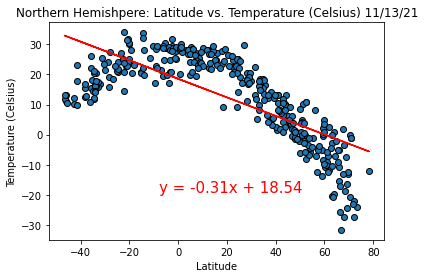

In [184]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Celsius)'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.2541463220098863



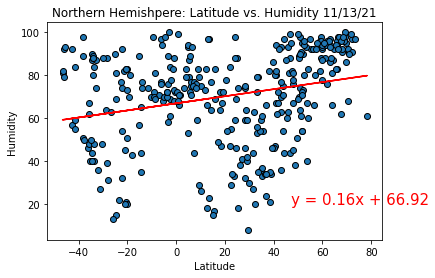

In [185]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(47,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.22241031491916136
The line equation is: y = 0.25x + 59.39



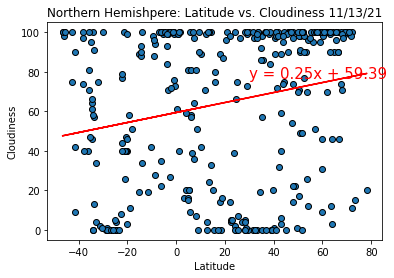

In [186]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(30,77),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}")
print(f"The line equation is: {line_eq}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()


### Southern Plot Chart

The r-squared is: -0.624620795600665



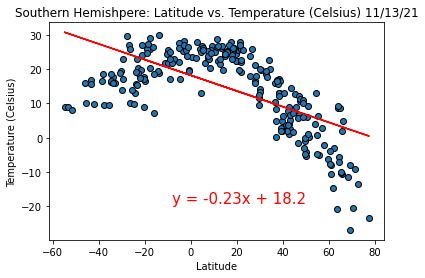

In [187]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Celsius)'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.13736528316716207



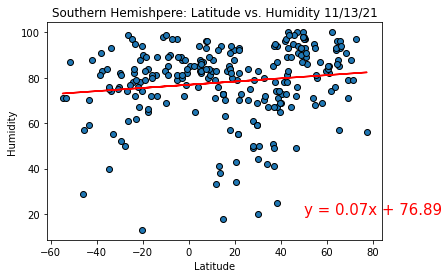

In [188]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.051946488518703496



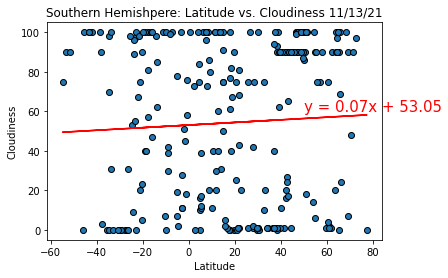

In [189]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,60),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()
